# Anime Recommendation System
 

<img src="https://cdn.vox-cdn.com/thumbor/-QP8NzuepshFimG4d5ACdUxyX4s=/0x0:1024x768/1200x800/filters:focal(431x303:593x465)/cdn.vox-cdn.com/uploads/chorus_image/image/66217104/5986912410_682fed19e2_b.0.jpg" style="width: 100%; height: 100%" align = "left">


# Table of contents

[<h3> 1. Exploratory data analysis and data cleaning</h3>](#1)

[<h3>2. Recommendation System</h3>](#2)

[<h3>3. Recommendations</h3>](#3)

   [<h4>3.1. Dragon Ball Z</h4>](#4)

  

In the notebook we will build a basic anime collaborative recommendation system. First of all let's have a look at the dataset.

This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings. Its composition in numbers: 
* 20.000.000 ratings
* 460.000 tags
* 27.000 movies

<h2> Content:</h2>

**Anime.csv that contains ratings of movies by users:**
* **anime_id** - Number which identifies the anime(unique id).
* **name** -  Name of the anime(in Japanese or English).
* **genre** - The type of anime(helps in recommending).
* **type** - It has like it is a TV series or movie or OVA, etc.
* **episodes** -How many episodes are there in the series and 1 if it is a movie.
* **rating** - Users rating for the anime.
* **members** -  Number of community members that are in this anime's group


**Rating.csv that contains movie information:**
* **user_id** - User-id which is randomly generated while collecting the data.
* **anime_id** - id of the anime that the user has rated using his id.
* **rating** - Rating is given by the user to the specific anime(ranges between 1 to 10)(-1 means the user has watched it but he did not give any rating).






# 1. Exploratory data analysis and data cleaning<a class="anchor" id="1"></a>



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
anime = pd.read_csv('anime dataset.csv')
rating = pd.read_csv('rating.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
anime.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
rating.describe()

,user_id,anime_id,rating
count,7.813737e+06,7.813737e+06,7.813737e+06
mean,3.672796e+04,8.909072e+03,6.144030e+00
std,2.099795e+04,8.883950e+03,3.727800e+00
min,1.000000e+00,1.000000e+00,-1.000000e+00
25%,1.897400e+04,1.240000e+03,6.000000e+00
50%,3.679100e+04,6.213000e+03,7.000000e+00
75%,5.475700e+04,1.409300e+04,9.000000e+00
max,7.351600e+04,3.451900e+04,1.000000e+01


In [7]:
# Lets have a look the distribution of ratings, because those "-1" are suspicious
rating.rating.value_counts()
# value_counts() returns a series of counts of unique values in descending order.

 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: rating, dtype: int64

I'm not sure what the "-1" mean because the ratings goes from 1 up to 10. Maybe it means, that no rating are available. Therefore we will delete the row with "-1" in rating

In [8]:
# we actually do not know what is '-1' rating means but in content then mentioned that user whatched 
# but did not gave any rating
# So,we will simply delete that one
rating = rating[rating["rating"] != -1]

In [9]:
print("anime.csv - rows: ",(anime.shape[0]), "columns: ",(anime.shape[1]))
print("rating.csv - rows:", (rating.shape[0])," columns: ", (rating.shape[1]))

anime.csv - rows:  12294 columns:  7
rating.csv - rows: 6337241  columns:  3


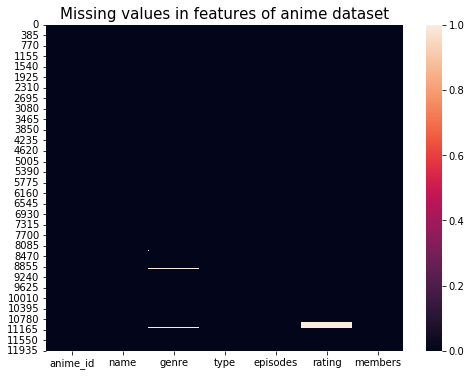

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(anime.isnull())
plt.title("Missing values in features of anime dataset", fontsize = 15)
plt.show()

The anime dataset has some missing values in rating and genre, but we can ignore them, because we won't use those columns later.

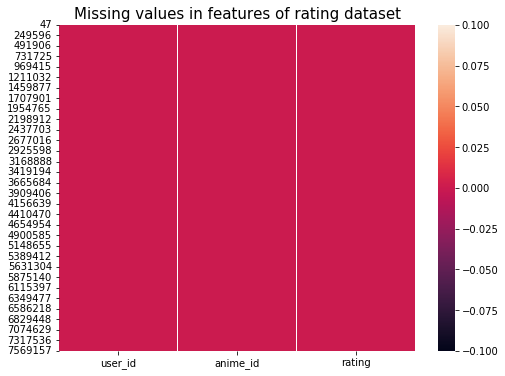

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(rating.isnull())
plt.title("Missing values in features of rating dataset", fontsize = 15)
plt.show()

## 1.1. Prepare the data

In [12]:
#We will merge anime and rating datasets and keep only the columns we will use.
#And to proceed further we need to count the no. of ratings for each anime.

df = pd.merge(rating,anime[["anime_id","name"]], left_on = "anime_id", right_on = "anime_id").drop("anime_id", axis = 1)
df.head()

,user_id,rating,name
0,1,10,Highschool of the Dead
1,3,6,Highschool of the Dead
2,5,2,Highschool of the Dead
3,12,6,Highschool of the Dead
4,14,6,Highschool of the Dead


In [14]:
# count the rating for each anime
count_rating = df.groupby("name")["rating"].count().sort_values(ascending = False)
count_rating

name
Death Note                         34226
Sword Art Online                   26310
Shingeki no Kyojin                 25290
Code Geass: Hangyaku no Lelouch    24126
Angel Beats!                       23565
                                   ...  
Ashita no Eleventachi                  1
Ashita e Mukau Hito                    1
Shounen Ninja Kaze no Fujimaru         1
Hi no Tori: Hagoromo-hen               1
Mechakko Dotakon                       1
Name: rating, Length: 9926, dtype: int64

In [16]:
#In the above output, we can see that there are anime names with 1 rating 
# and there are other animes with such a count so we will remove those with a count less than 5000(m value).
#These values will deviate from our study and deleting those values will improve our recommendation accuracy.

m = 5000
more_than_m_ratings = count_rating[count_rating.apply(lambda x: x >= m)].index

# Keep only the animes with a least m ratings in the DataFrame
df_m = df[df['name'].apply(lambda x: x in more_than_m_ratings)]

In [17]:
before = len(df.name.unique())
after = len(df_m.name.unique())
rows_before = df.shape[0]
rows_after = df_m.shape[0]
print("There are", (before),"animes in the dataset before filtering and", (after),"animes after the filtering.",
(before),"animes =>", (after)," animes",(rows_before),"rows before filtering =>", (rows_after)," rows after filtering")

There are 9926 animes in the dataset before filtering and 279 animes after the filtering. 9926 animes => 279  animes 6337239 rows before filtering => 2517097  rows after filtering


# 2. Collaborative Recommendation System<a class="anchor" id="2"></a>

In [18]:
# Create a matrix with userId as rows and the titles of the movies as column.
# Each cell will have the rating given by the user to the animes.
# There will be a lot of NaN values, because each user hasn't watched most of the animes
df_recommended = df_m.pivot_table(index='user_id',columns='name',values='rating')
df_recommended.iloc[:5,:5]

name,Accel World,Afro Samurai,Air,Air Gear,Akame ga Kill!
user_id,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,7.0,6.0,NaN,NaN,8.0
5,3.0,NaN,NaN,NaN,4.0
7,8.0,NaN,NaN,NaN,NaN


In [19]:
df_m.name.value_counts().head(10)

Death Note                            34226
Sword Art Online                      26310
Shingeki no Kyojin                    25290
Code Geass: Hangyaku no Lelouch       24126
Angel Beats!                          23565
Elfen Lied                            23528
Naruto                                22071
Fullmetal Alchemist: Brotherhood      21494
Fullmetal Alchemist                   21332
Code Geass: Hangyaku no Lelouch R2    21124
Name: name, dtype: int64

In [20]:
def find_corr(df, name):
    similar_to_movie = df.corrwith(df[name])
    similar_to_movie = pd.DataFrame(similar_to_movie,columns=['Correlation'])
    similar_to_movie = similar_to_movie.sort_values(by = 'Correlation', ascending = False)
    return similar_to_movie

# 3. Recommendations <a class="anchor" id="3"></a>

Now we will try our recommendation on any Anime.

* The higher the correlation, the higher the possibility that the viewer of the selected anime will like the recommended anime
* Negative correlation means that the viewer is likely to dislikes the anime

## 3.1. [Dragon Ball Z]<a class="anchor" id="4"></a>
<img src="https://miro.medium.com/max/1400/1*nFQqETyMOcItF_0IasBcfw.jpeg" style="width: 100%; height: 100%" align = "left">



In [21]:
# we will give anime name as input
anime1 = 'Dragon Ball Z'
# recommended ones
find_corr(df_recommended, anime1).head(40)

,Correlation
name,
Dragon Ball Z,1.000000
Dragon Ball,0.696191
Dragon Ball GT,0.519401
InuYasha,0.463992
Yuu☆Yuu☆Hakusho,0.461899
Bleach,0.452455
Pokemon,0.452286
Naruto,0.437442
Digimon Adventure 02,0.429204


In [23]:
# Tail means last ones means which are basically not recommended ones.
find_corr(df_recommended, anime1).tail(40)

,Correlation
name,
Evangelion: 2.0 You Can (Not) Advance,0.205074
Clannad: After Story,0.204166
Kara no Kyoukai 1: Fukan Fuukei,0.203909
Fate/Zero 2nd Season,0.203749
Monogatari Series: Second Season,0.199584
Wolf&#039;s Rain,0.196745
Natsume Yuujinchou,0.196160
Fate/Zero,0.196105
Ookami Kodomo no Ame to Yuki,0.194914
